In [1]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [3]:
df = pd.read_csv('../data/car_price.csv')

# Exploration des données

### Affichage des 10 premières lignes

In [17]:
df.head(10)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1.0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2.0,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3.0,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4.0,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5.0,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
5,6.0,Audi,2019,2.4,Diesel,Automatic,246553,Like New,88969.76,Q7
6,7.0,Audi,2020,4.0,Electric,Automatic,135486,Used,63498.75,Q5
7,8.0,Tesla,2017,5.3,Hybrid,Automatic,83030,New,17381.19,Model Y
8,9.0,Honda,2023,5.7,Electric,Manual,120360,Like New,15905.62,Civic
9,10.0,Ford,2010,1.5,Electric,Automatic,135009,Like New,9560.22,Explorer


### On regarde le type de chacune des colonnes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2250 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Car ID        2250 non-null   float64 
 1   Brand         2250 non-null   category
 2   Year          2250 non-null   int64   
 3   Engine Size   2250 non-null   float64 
 4   Fuel Type     2250 non-null   category
 5   Transmission  2250 non-null   category
 6   Mileage       2250 non-null   int64   
 7   Condition     2250 non-null   category
 8   Price         2250 non-null   float64 
 9   Model         2250 non-null   category
dtypes: category(5), float64(3), int64(2)
memory usage: 118.5 KB


### Suppression des valeurs null

In [10]:
df.dropna(inplace=True)

### Transformation des type 'object' en 'category' et de certains 'float' en 'int'

In [11]:
# Conversion en category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Conversion en int
df['Year'] = df['Year'].astype(int)
df['Mileage'] = df['Mileage'].astype(int)

### Suppression des doublons

In [12]:
df = df.drop_duplicates()

### Valeurs aberrantes

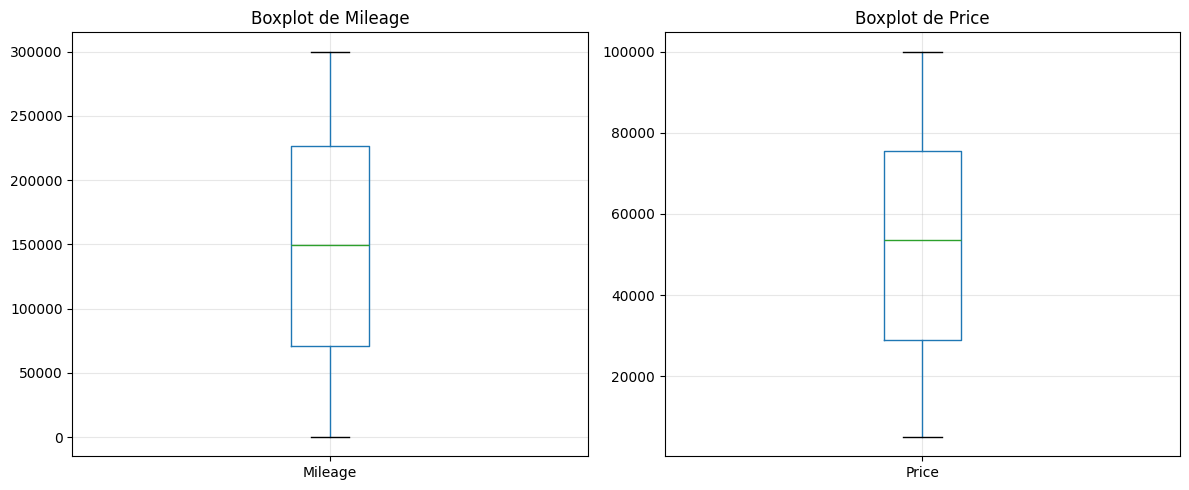

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df.boxplot(column='Mileage', ax=axes[0])
axes[0].set_title('Boxplot de Mileage')
axes[0].grid(True, alpha=0.3)

df.boxplot(column='Price', ax=axes[1])
axes[1].set_title('Boxplot de Price')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

On s'aperçoit pour la colonne 'Price' et 'Mileage' qu'il n'y a aucune valeur aberrante. Il n'y a donc aucun travail à faire sur des valeurs spécifiques.

### Matrice de corrélation

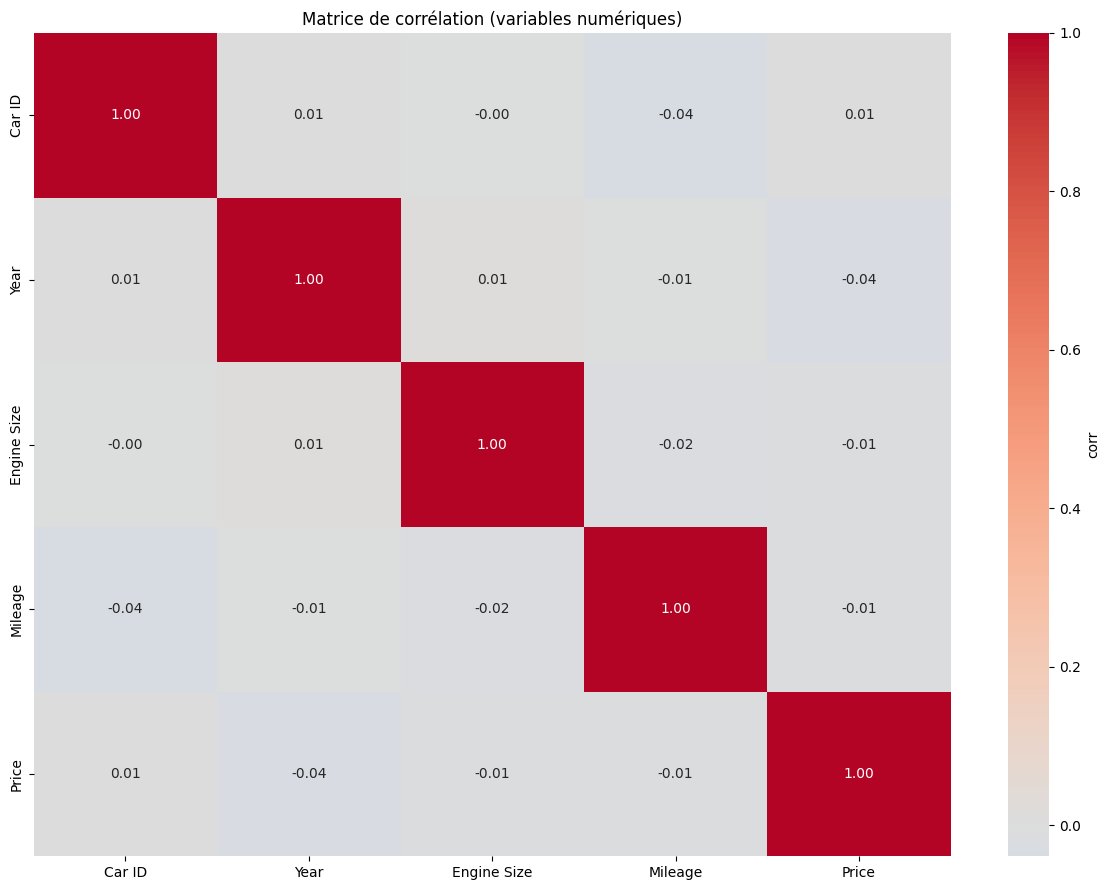

In [22]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f",
            cbar_kws={"label": "corr"})
plt.title("Matrice de corrélation (variables numériques)")
plt.tight_layout()
plt.show()